<a href="https://colab.research.google.com/github/bikash-bhoi/eva4/blob/master/Session15/Session15A_Mask_RCNN01A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import os


In [0]:
#copy bg/fg/mask files from Drive
%%bash
cd /content
mkdir Mask_RCNN
cp -r /content/gdrive/My\ Drive/Mask_RCNN/* Mask_RCNN/
ls Mask_RCNN/Cars_Fg/ |wc -l
ls Mask_RCNN/Cars_Mask/ |wc -l
ls Mask_RCNN/background/ |wc -l
ls Mask_RCNN/fg_bg/ |wc -l
ls Mask_RCNN/fg_bg_mask/ |wc -l
ls -lrt Mask_RCNN/

100
100
100
0
0
total 20
drwx------ 2 root root 4096 May  3 17:19 background
drwx------ 2 root root 4096 May  3 17:20 Cars_Fg
drwx------ 2 root root 4096 May  3 17:21 fg_bg
drwx------ 2 root root 4096 May  3 17:21 fg_bg_mask
drwx------ 2 root root 4096 May  3 17:27 Cars_Mask


mkdir: cannot create directory ‘Mask_RCNN’: File exists


In [0]:
## Function to Create Overlay
def overlay_fg_bg(fg,bg,x_offset,y_offset,tgt_save):
    fg_bg=bg.copy()
    y1, y2 = y_offset, y_offset + fg.shape[0]
    x1, x2 = x_offset, x_offset + fg.shape[1]
    
    alpha_fg = fg[:, :, 3] / 255.0
    alpha_bg = 1.0 - alpha_fg

    for c in range(0, 3):
        fg_bg[y1:y2, x1:x2, c] = (alpha_fg * fg[:, :, c] +
                                  alpha_bg * bg[y1:y2, x1:x2, c])


    cv2.imwrite(tgt_save,fg_bg)
    
    #arr = np.asarray(fg_bg)
    #plt.imshow(arr, vmin=0, vmax=255)
    #plt.show()
    
def overlay_mask(fg,bg,x_offset,y_offset,tgt_save):
    fg_bg=bg.copy()
    fg_bg[y_offset:y_offset+fg.shape[0], x_offset:x_offset+fg.shape[1]] = fg

    cv2.imwrite(tgt_save,fg_bg)

In [0]:
tgt_path="./Mask_RCNN/fg_bg/"
mask_tgt_path="./Mask_RCNN/fg_bg_mask/"
bg_path="./Mask_RCNN/background/"
fg_path="./Mask_RCNN/Cars_Fg/"
mask_path="./Mask_RCNN/Cars_Mask/"

mask_bg = np.zeros((160,160), np.uint8)

for i_bg in os.listdir(bg_path):
    bg = cv2.imread(bg_path+i_bg)
    bg_name=os.path.splitext(i_bg)[0]
    
    for i_fg in os.listdir(fg_path):
        fg = cv2.imread(fg_path+i_fg, -1)
        fg_name=os.path.splitext(i_fg)[0]
        mask_fg = cv2.imread(mask_path+i_fg, -1)
        fg_flip=cv2.flip(fg,1)
        fg_flip_name=fg_name+'_flip'
        mask_fg_flip=cv2.flip(mask_fg,1)
        for i in range(1,21):
            x_offset=randint(10,86)
            y_offset=randint(10,102)
            #fg on bg
            tgt_save=tgt_path+bg_name+fg_name+'-'+str(i)+'.jpg'
            overlay_fg_bg(fg,bg,x_offset,y_offset,tgt_save)
            
            #mask on black bg
            tgt_save=mask_tgt_path+bg_name+fg_name+'-'+str(i)+'.jpg'
            overlay_mask(mask_fg,mask_bg,x_offset,y_offset,tgt_save)

            #LR Flipped fg on bg
            tgt_save=tgt_path+bg_name+fg_flip_name+'-'+str(i)+'.jpg'
            overlay_fg_bg(fg_flip,bg,x_offset,y_offset,tgt_save)
            
            #LR Flipped mask on black bg
            tgt_save=mask_tgt_path+bg_name+fg_flip_name+'-'+str(i)+'.jpg'
            overlay_mask(mask_fg_flip,mask_bg,x_offset,y_offset,tgt_save)

In [0]:
%%bash
##Copy overlay fg_bg and mask images to Drive
#cp ./Mask_RCNN/fg_bg/* /content/gdrive/My\ Drive/Mask_RCNN/fg_bg/
#cp ./Mask_RCNN/fg_bg_mask/* /content/gdrive/My\ Drive/Mask_RCNN/fg_bg_mask/

In [0]:
#Zip files to Google Drive
%%bash
zip -r /content/gdrive/My\ Drive/Mask_RCNN/fg_bg.zip ./Mask_RCNN/fg_bg
zip -r /content/gdrive/My\ Drive/Mask_RCNN/fg_bg_mask.zip ./Mask_RCNN/fg_bg_mask

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
#Unzip Files to local
%%bash
unzip -d /content ./Mask_RCNN/fg_bg.zip
unzip -d /content ./Mask_RCNN/fg_bg_mask.zip

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
!git clone https://github.com/ialhashim/DenseDepth.git

Cloning into 'DenseDepth'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 235 (delta 0), reused 1 (delta 0), pack-reused 231
Receiving objects: 100% (235/235), 11.80 MiB | 5.30 MiB/s, done.
Resolving deltas: 100% (113/113), done.


In [0]:
!wget https://s3-eu-west-1.amazonaws.com/densedepth/kitti.h5 -O ./DenseDepth/kitti.h5

--2020-05-03 18:14:36--  https://s3-eu-west-1.amazonaws.com/densedepth/kitti.h5
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.57.83
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.57.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172897384 (165M) [application/x-www-form-urlencoded]
Saving to: ‘./DenseDepth/kitti.h5’

./DenseDepth/kitti. 100%[===================>] 164.89M  10.1MB/s    in 18s     

2020-05-03 18:14:56 (8.93 MB/s) - ‘./DenseDepth/kitti.h5’ saved [172897384/172897384]



In [0]:
!ls /content/Mask_RCNN/fg_bg/ |head

bg_100fg_100-10.jpg
bg_100fg_100-11.jpg
bg_100fg_100-12.jpg
bg_100fg_100-13.jpg
bg_100fg_100-14.jpg
bg_100fg_100-15.jpg
bg_100fg_100-16.jpg
bg_100fg_100-17.jpg
bg_100fg_100-18.jpg
bg_100fg_100-19.jpg


In [0]:
img=cv2.imread('/content/Mask_RCNN/fg_bg/bg_10fg_100-10.jpg')
img2=cv2.resize(img,(160,160))
cv2.imwrite('/content/DenseDepth/test1.jpg',img2)

True

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

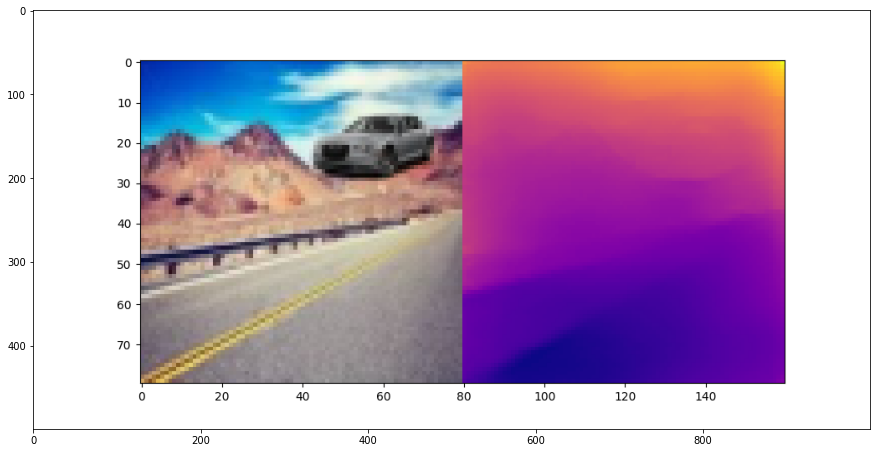

In [0]:
!cd DenseDepth; python test.py --model kitti.h5 --input '/content/Mask_RCNN/fg_bg/bg_86fg_100-14.jpg'
plt.figure(figsize=(15,15))
plt.imshow( io.imread('./DenseDepth/test.png') )

In [0]:
!pip install tensorflow-gpu==1.13.1
!pip install q keras==2.2.4

     |████████████████████████████████| 345.2MB 47kB/s 
     |████████████████████████████████| 3.2MB 35.7MB/s 
     |████████████████████████████████| 368kB 55.9MB/s 
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
     |████████████████████████████████| 317kB 14.7MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1
